In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [155]:
file_path = 'резисторы.xlsx'
df = pd.read_excel(file_path)
df


,Шуминов,Шульга,Хабибуллин
0,498.5,498.6,497.2
1,500.1,502.3,500.2
2,498.7,500.1,500.6
3,499.2,499.2,497.5
4,500.1,499.4,499.4
...,...,...,...
85,499.8,499.9,501.7
86,503.3,500.1,499.4
87,501.3,498.8,500.6
88,498.2,500.6,497.8


In [156]:
df_joined = pd.concat([df['Шуминов'], df['Шульга'], df['Хабибуллин']], ignore_index=True)
df_joined

0      498.5
1      500.1
2      498.7
3      499.2
4      500.1
       ...  
265    501.7
266    499.4
267    500.6
268    497.8
269    499.2
Length: 270, dtype: float64

In [157]:
def analyze(data, filename):
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Создаем 3 графика в одной строке
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.3)
    for m, ax in zip([10, 20], axes):
        title = rf'$m = {m}$'

        # Calculate the mean and standard deviation
        mean = np.mean(data)
        std_dev = np.std(data)

        # Create a histogram
        ax.hist(data, bins=m, density=True, alpha=0.6, color='g', label=f'Гистограмма')

        # Plot Gaussian distribution
        xmin, xmax = np.min(data), np.max(data)
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mean, std_dev)
        ax.plot(x, p, 'k', linewidth=2, label='Гауссово распрделение')

        # Mark mean and standard deviation
        ax.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=rf'$\langle R \rangle$')
        ax.axvline(mean + std_dev, color='b', linestyle='dashed', linewidth=2, label=rf'$\langle R \rangle \pm \sigma$')
        ax.axvline(mean - std_dev, color='b', linestyle='dashed', linewidth=2)

        # Add labels and legend
        ax.set_title(title)
        ax.set_xlabel(r"$R, Ом$", fontsize=10)
        ax.set_ylabel(r'$y = \frac{\Delta n}{N\Delta R}, Ом^{-1}$')
        ax.legend()

    # Общая подпись
    fig.text(0.5, 0.04, rf'$\langle R \rangle = {mean:.2f}\: Ом$', ha='center', fontsize=14)
    fig.text(0.5, 0.01, rf'$\sigma = {std_dev:.2f}\: Ом$', ha='center', fontsize=14)

    # Show the plot
    plt.savefig(filename)
    plt.show()

    print(f'{mean=}')
    print(f'{std_dev=}')
    print(((mean - std_dev < mean) & (data < mean + std_dev)).sum() / len(data))
    print(((mean - 2 * std_dev < mean) & (data < mean + 2 * std_dev)).sum() / len(data))


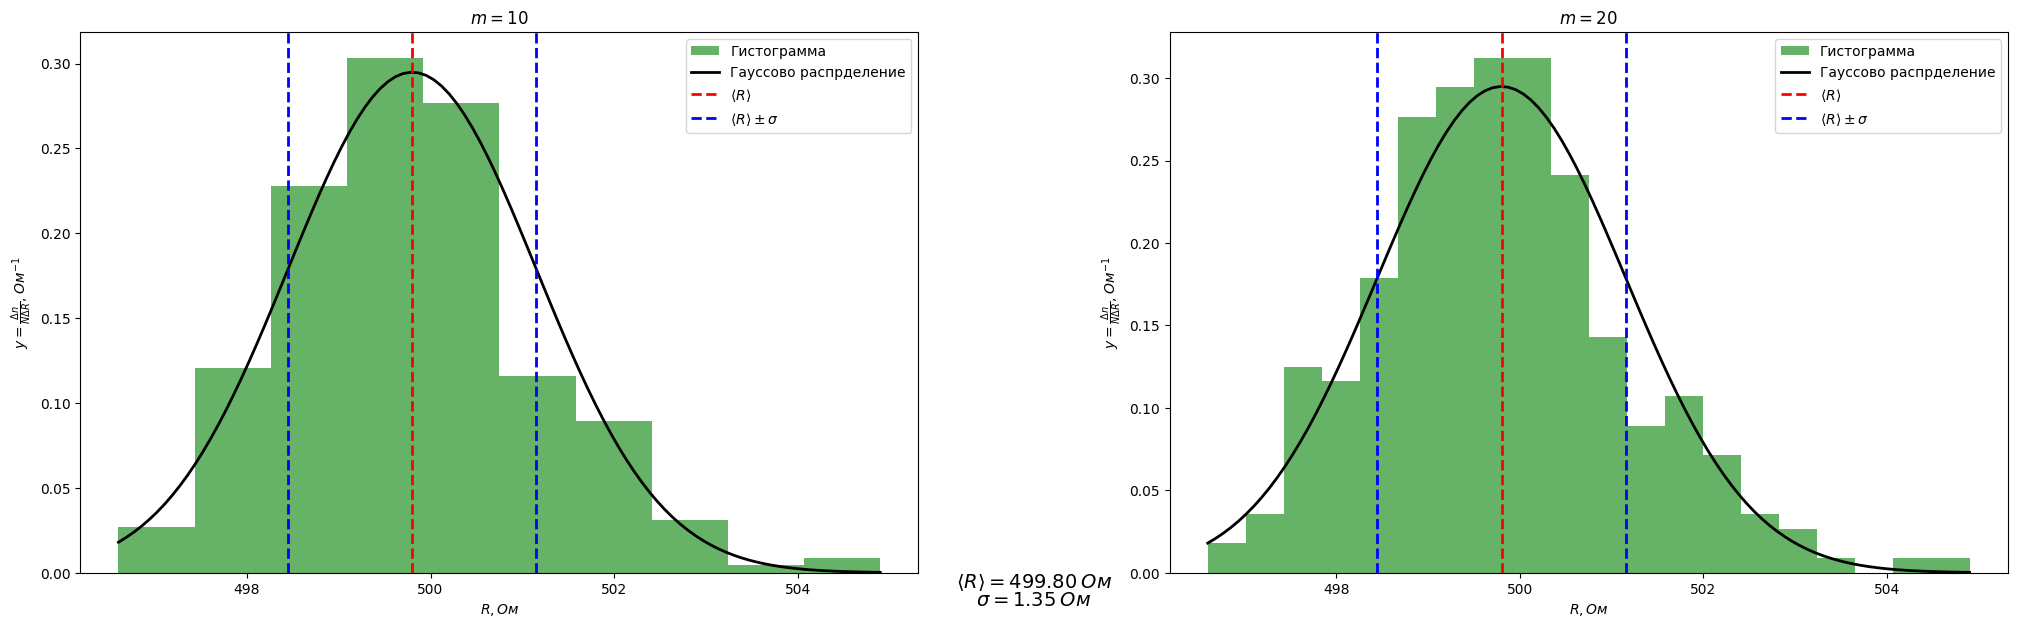

mean=499.8003703703703
std_dev=1.352870696735296
0.8518518518518519
0.9703703703703703


In [158]:
analyze(df_joined, 'resistorsSSH.svg')

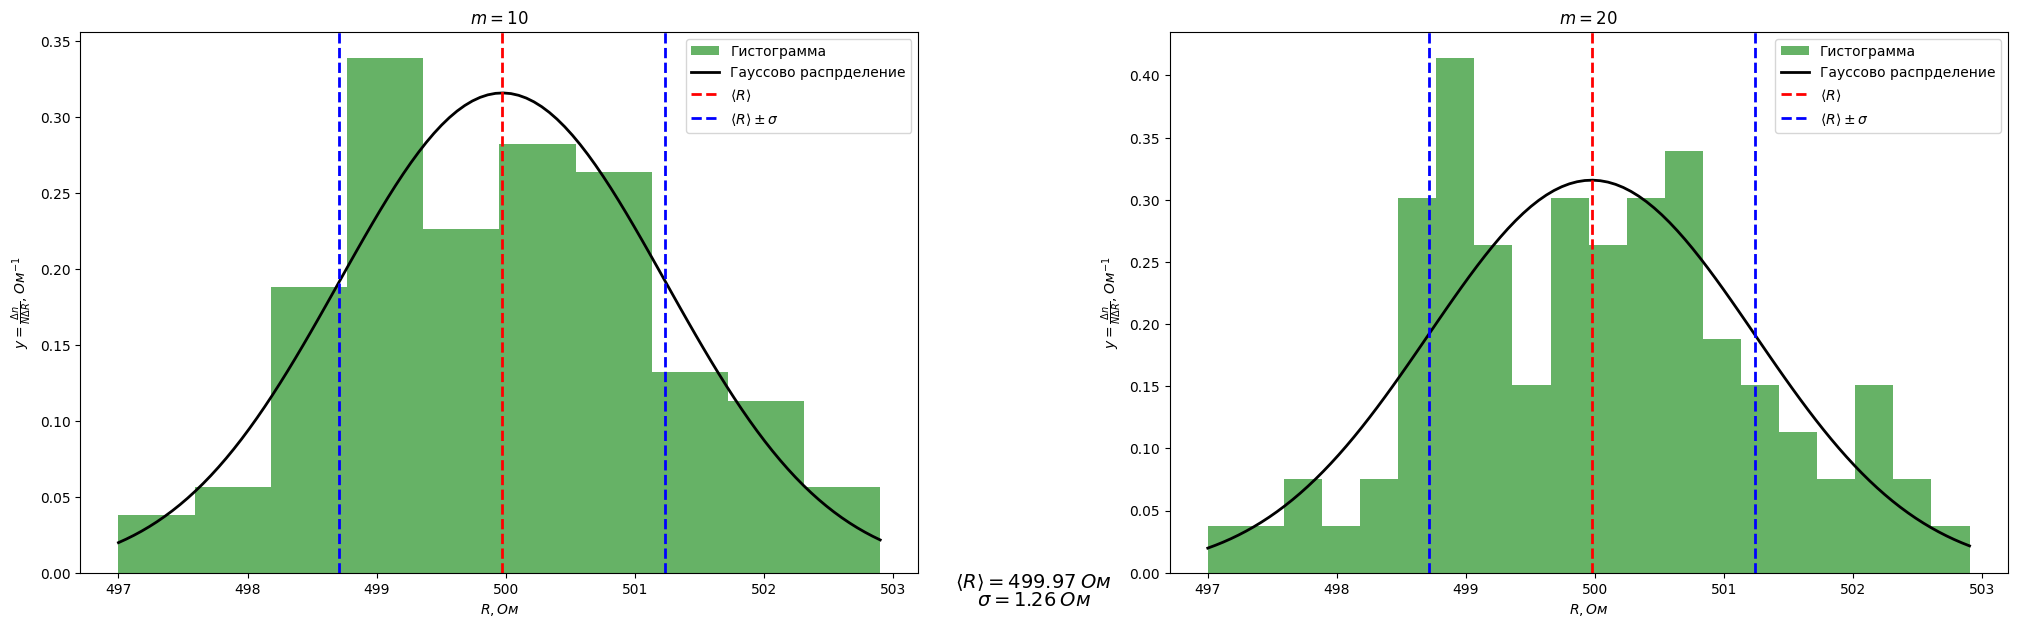

mean=499.97333333333324
std_dev=1.2633113454550928
0.8555555555555555
0.9666666666666667


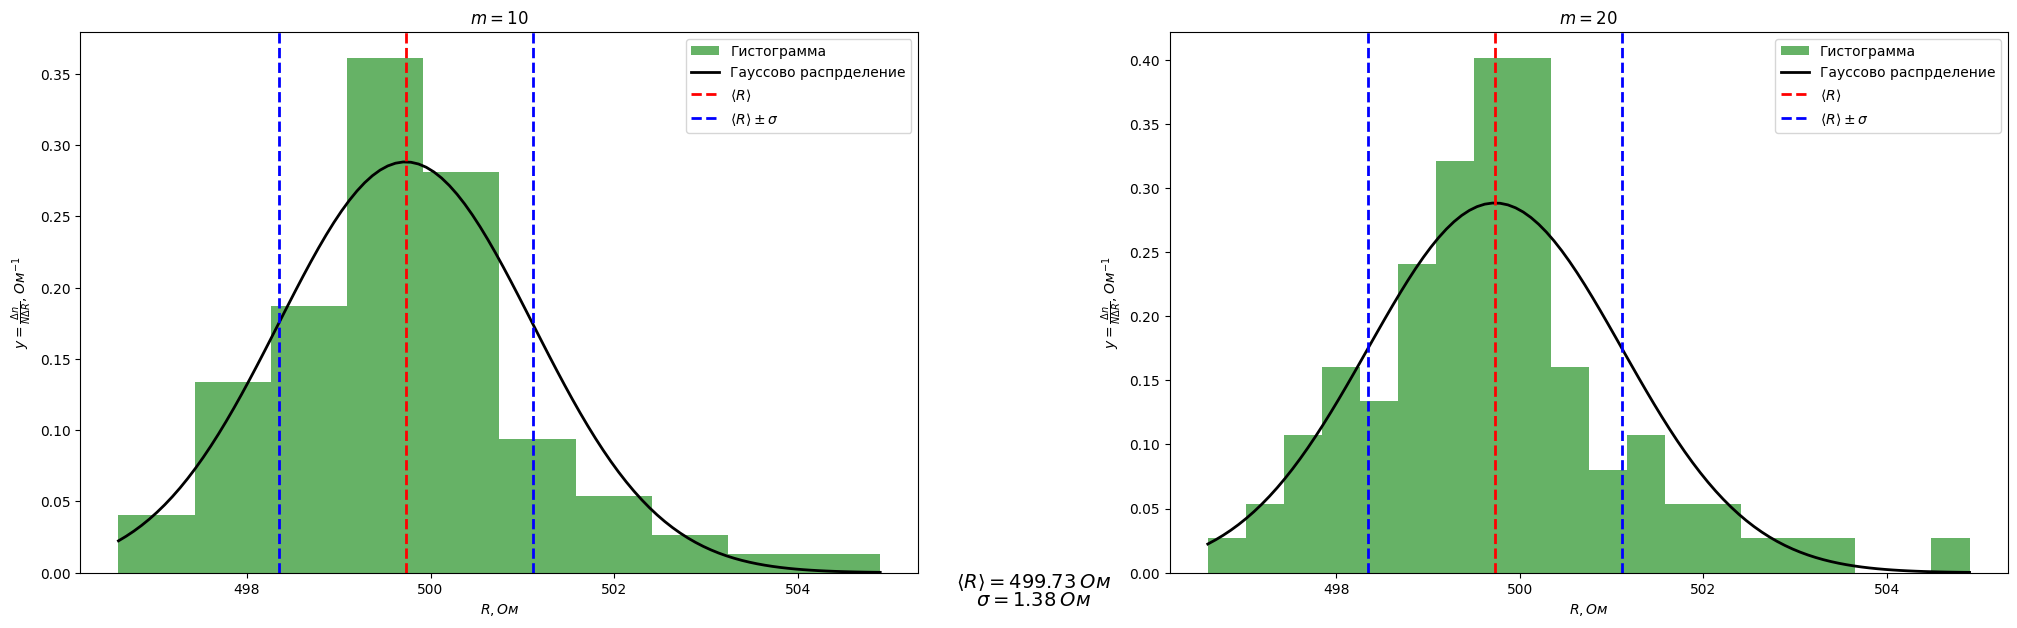

mean=499.7288888888889
std_dev=1.3836541350467932
0.8666666666666667
0.9555555555555556


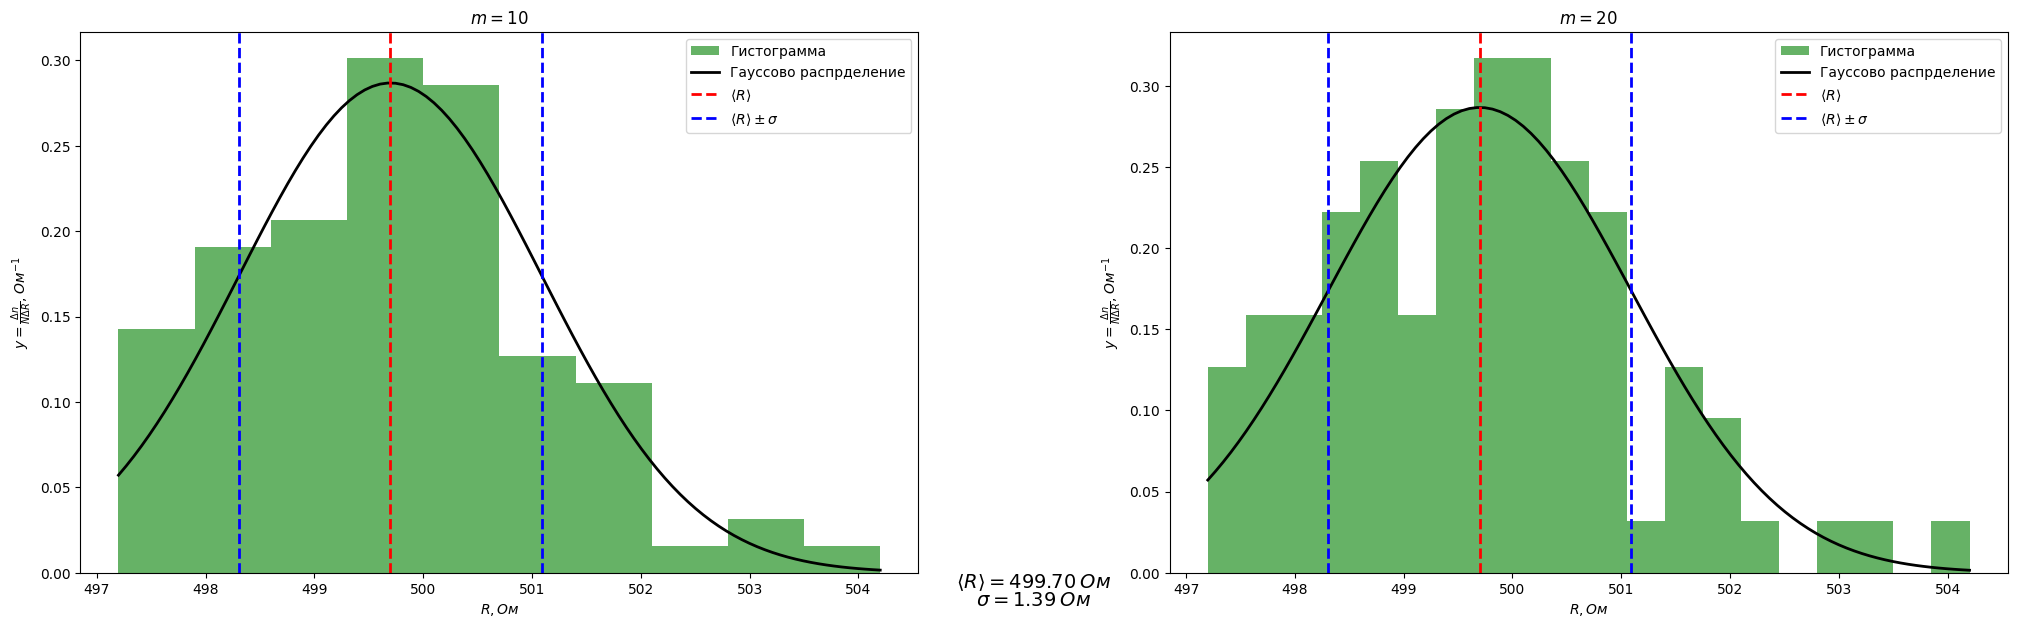

mean=499.6988888888889
std_dev=1.3910423305680153
0.8666666666666667
0.9666666666666667


In [159]:
analyze(df['Шульга'], 'resistorsShulga.svg')
analyze(df['Шуминов'], 'resistorsShuminov.svg')
analyze(df['Хабибуллин'], 'resistorsHabibullin.svg')

In [164]:
array = df.to_numpy()
array = array.transpose()
array = array.reshape(15, 18)
array = array.transpose()
new_df = pd.DataFrame(array)
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,498.5,499.3,501.0,496.6,501.3,498.6,501.1,499.2,498.9,500.0,497.2,499.8,498.0,502.8,500.8
1,500.1,500.5,500.2,497.6,497.6,502.3,501.6,497.0,501.0,500.1,500.2,498.5,498.7,500.3,497.8
2,498.7,499.3,499.3,501.7,497.7,500.1,498.3,499.2,497.6,500.6,500.6,498.4,499.3,500.4,500.0
3,499.2,498.8,499.6,499.9,499.8,499.2,499.1,498.6,498.1,498.8,497.5,498.7,499.7,500.3,499.8
4,500.1,500.2,498.1,499.7,502.9,499.4,500.3,502.1,498.9,498.5,499.4,499.1,501.0,497.2,497.9
5,497.8,498.9,500.1,500.3,499.9,501.1,500.5,500.6,499.9,500.8,500.6,497.7,498.9,499.9,500.6
6,499.1,498.6,501.6,497.2,499.0,499.9,501.6,499.2,501.2,500.0,499.9,499.3,499.8,498.8,501.4
7,499.8,500.2,502.0,499.6,498.6,501.8,499.0,499.9,502.9,497.5,498.1,499.8,504.2,501.0,498.4
8,499.8,500.1,498.5,500.5,499.4,500.7,501.2,500.4,502.6,500.7,497.8,500.0,498.3,500.9,501.7
9,500.7,500.9,498.8,500.7,501.5,502.3,502.5,499.0,497.8,499.2,499.4,499.7,499.3,500.0,501.9


In [162]:
new_df.to_latex(buf='table_.tex', decimal=',', longtable=1, float_format="{:0.1f}".format, index=False)